In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd = os.getcwd()
filepath = os.path.join(pwd,"housing.csv")
filepath

'c:\\Users\\Adil Naqvi\\Desktop\\Projects\\House price prediction using Regression\\housing.csv'

In [4]:
house_data = pd.read_csv(filepath)
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
house_data['ocean_proximity'].value_counts()
#   Number of house located in different regions 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

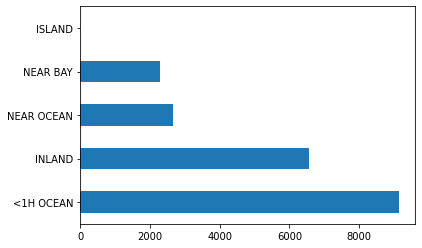

In [7]:
house_data['ocean_proximity'].value_counts().plot(kind='barh')

<AxesSubplot:>

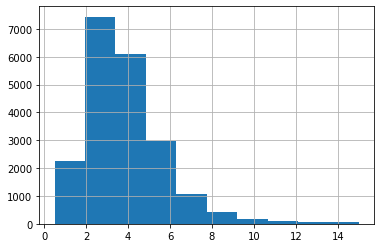

In [8]:
house_data['median_income'].hist()

#### We can group the Median income of household into bins as this column is a big factor in determining the median house price

In [9]:
house_data['income_category'] = pd.cut(x=house_data['median_income'],
                                bins=[0,1.5,3,4.5,6,np.inf],
                                labels=[1,2,3,4,5])
house_data['income_category'].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_category, dtype: int64

<AxesSubplot:>

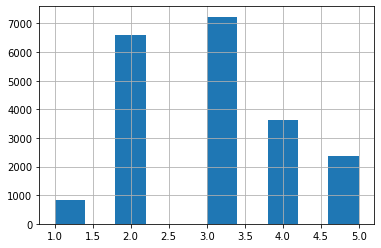

In [10]:
house_data['income_category'].hist()
#   Gives a hist of average income of households ranging from low income to high incomes

In [11]:
y = house_data['median_house_value']
X = house_data.drop(['median_house_value'],axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [12]:
y 
#     This is the dependent variable that we need to predict using Features from X

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

### Split the Dataset "X" in test and train 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(13828, 10) (13828,)
(6812, 10) (6812,)


<AxesSubplot:>

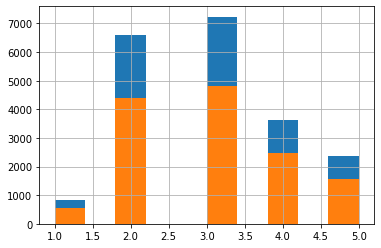

In [15]:
house_data['income_category'].hist()
X_train['income_category'].hist()

##### For a GOOD training dataset, it should be consistent with the original dataset
##### ie. X_train needs to be consistent with house_data
##### We can use Stratified Split to ensure the consistency

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42)
for train_index,test_index in split.split(house_data,house_data['income_category']):
    strat_train = house_data.loc[train_index]
    strat_test = house_data.loc[test_index]

In [17]:
(strat_test['income_category'].value_counts()/len(strat_test)).sort_index()

1    0.039783
2    0.318849
3    0.350558
4    0.176307
5    0.114504
Name: income_category, dtype: float64

In [18]:
(house_data['income_category'].value_counts()/len(house_data)).sort_index()

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_category, dtype: float64

<AxesSubplot:>

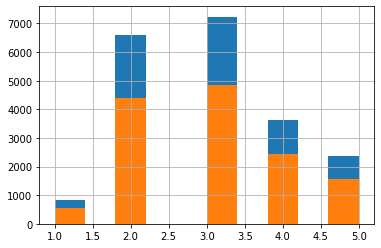

In [19]:
house_data['income_category'].hist()
strat_train['income_category'].hist()

#### The above ensured that the Train and Test data Sets are very much consistent with the original data set based on the "income_category" column 

In [20]:
strat_train.drop(['income_category'],axis=1,inplace=True)
strat_test.drop(['income_category'],axis=1,inplace=True)
#   We dropped the Income Category column as it is no longer needed for the prediction model
#   it was only for the purpose of classification of training and testing dataSets

In [21]:
housing = strat_train.copy()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

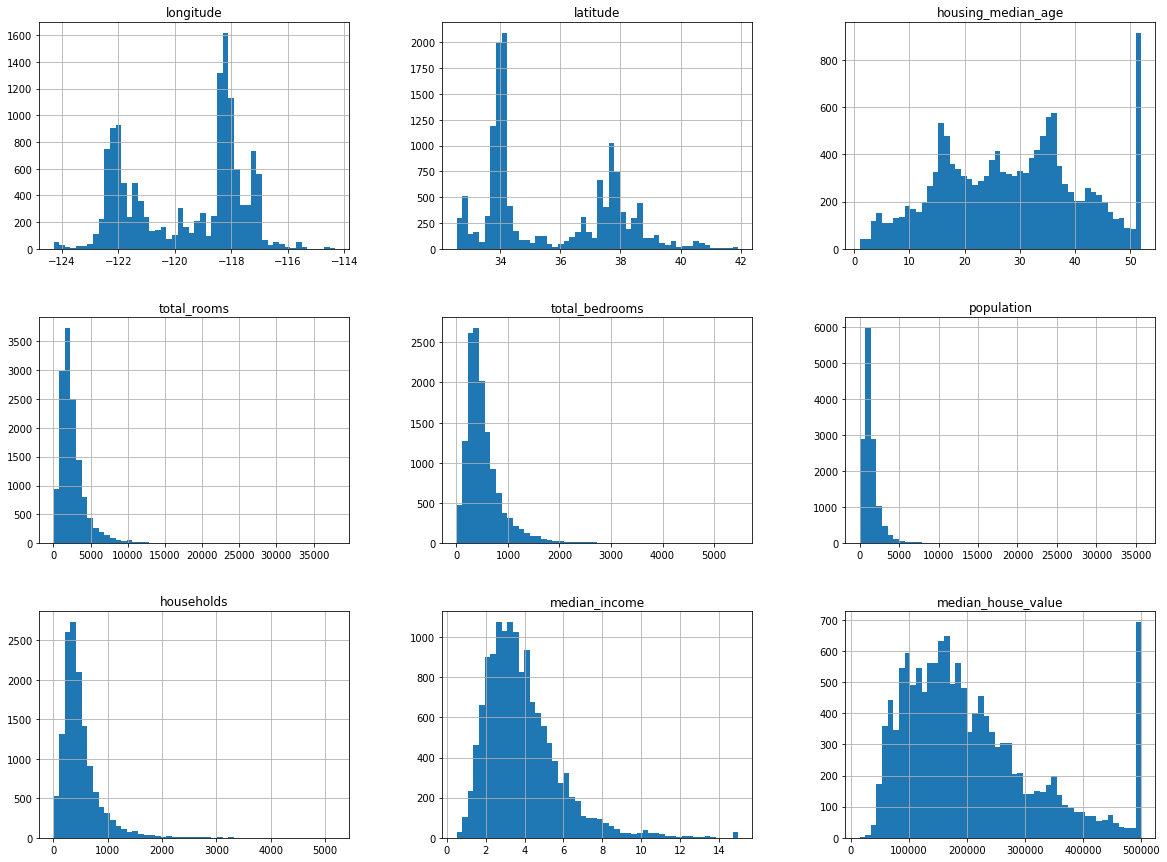

In [22]:
housing.hist(bins=50,figsize=(20,15))

## Correlation Matrix

In [23]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924425,-0.111518,0.052286,0.080533,0.109645,0.066610,-0.023741,-0.052886
latitude,-0.924425,1.000000,0.009539,-0.043430,-0.077287,-0.117782,-0.082241,-0.072663,-0.138196
housing_median_age,-0.111518,0.009539,1.000000,-0.362466,-0.322497,-0.296318,-0.303120,-0.112059,0.117018
total_rooms,0.052286,-0.043430,-0.362466,1.000000,0.929572,0.852793,0.918067,0.200348,0.135076
total_bedrooms,0.080533,-0.077287,-0.322497,0.929572,1.000000,0.874190,0.979507,-0.009781,0.047784
population,0.109645,-0.117782,-0.296318,0.852793,0.874190,1.000000,0.903072,0.002803,-0.025524
households,0.066610,-0.082241,-0.303120,0.918067,0.979507,0.903072,1.000000,0.011902,0.064619
median_income,-0.023741,-0.072663,-0.112059,0.200348,-0.009781,0.002803,0.011902,1.000000,0.688935
median_house_value,-0.052886,-0.138196,0.117018,0.135076,0.047784,-0.025524,0.064619,0.688935,1.000000


<AxesSubplot:>

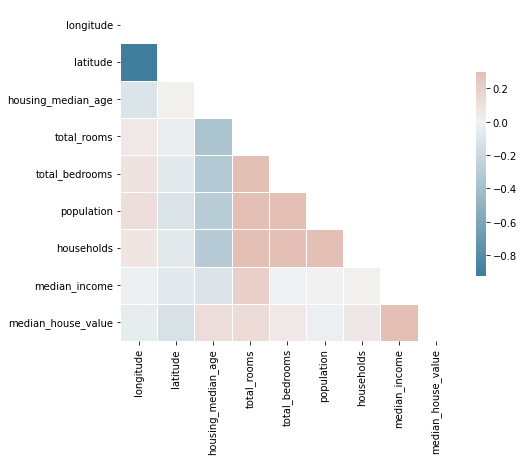

In [24]:
import seaborn as sns

corr = housing.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

f, ax = plt.subplots(figsize=(7.5,7.5))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.3,center=0,square=True ,linewidth=0.5, cbar_kws={"shrink":0.5})


###  __Preparing Data Set for Machine Learning__
##### -> __Feature Engineering__: Creating new features or columns out of existing data in the dataset
##### -> __Imputation__: Completeing the Data set by filling missing values
##### -> __Categorical Encoding__: Changing Categorical values to Numerical values
##### -> __Scaling__: Scaling the Dataset to prevent certain columns with high numerical values to overweight the prediction

In [100]:
housing = strat_train.drop(['median_house_value'],axis=1)
housing_labels = strat_train['median_house_value'].copy()

#   housing is exactly X_train here
#   housing_labels is exactly y_train here

#### Filling missing values

In [31]:
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,INLAND
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY
5222,-118.25,33.95,28.0,2136.0,NaN,1799.0,476.0,1.5427,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
16880,-122.39,37.59,32.0,4497.0,NaN,1846.0,715.0,6.1323,NEAR OCEAN
15137,-116.91,32.83,16.0,5203.0,NaN,2515.0,862.0,4.1050,<1H OCEAN
6220,-117.91,34.05,35.0,3189.0,NaN,1727.0,500.0,5.0758,<1H OCEAN


#### __We need to impute the NaN values in total_bedrooms column__
##### ie. we can fill median of the total_bedrooms in place of NaN values to solve missing values in the Data Set

In [32]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [35]:
housing.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [42]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,INLAND
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,<1H OCEAN
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,<1H OCEAN
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,<1H OCEAN
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,INLAND
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,<1H OCEAN
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,<1H OCEAN
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,NEAR OCEAN


#### __Encoding Categorical Values to change Objects into Numericals__

In [44]:
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [85]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
13325,INLAND
20355,<1H OCEAN
7481,<1H OCEAN
15465,<1H OCEAN
18116,<1H OCEAN
...,...
994,INLAND
5377,<1H OCEAN
5448,<1H OCEAN
9813,NEAR OCEAN


In [86]:
#   Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
housing_cat_ord = ord_encoder.fit_transform(housing_cat)
housing_cat_ord

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [4.],
       [1.]])

In [87]:
#   OneHot Encoding
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

#### OneHot Encoding removes the possibilty that the algorithm might assume that some category is better than the other, which sometimes occurs in case of Ordinal Encoding 
#### (Bcoz ordinal assigns random integers to different objects which can sometimes define priority)

In [88]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [89]:
housing_num = housing.drop(['ocean_proximity'],axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543


### __Feature Engineering__
#### This involves creating new features from exiting ones to better prepare the data set for ML algorithms

In [73]:
def feature_eng(data):
    data['bedrooms_per_Household'] = data['total_bedrooms']/data['households']
    data['population_per_household'] = data['population']/data['households']
    data['rooms_per_household'] = data['total_rooms']/data['households']
    
    return data

In [91]:
housing_feature_eng = feature_eng(housing_num)
housing_feature_eng

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_Household,population_per_household,rooms_per_household
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,1.023102,4.270627,3.993399
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,1.168919,1.983108,6.104730
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,1.039683,4.841270,4.325397
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,1.106117,2.906367,5.334582
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,1.018634,2.804348,6.627329
...,...,...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,0.983130,2.432052,5.255858
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,1.037175,2.486989,4.572491
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,1.089087,2.138085,4.445434
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,1.067371,2.474240,4.933950


### __Scaling the Data__
#### Scaling is important as in some columns such as "longitute" the value range is significantly smaller compared to range of values in columns such as "total_bedrooms".
#### In Unscaled data, the algorithm might think that the columns in which the value range is bigger is much more important, which might not be the case
#### Therefore in order to prevent that to happen, we Scale the Data with respect to all colunmns 
#### We use _StandardScaler_ to Scale the Data 

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_eng)
housing_scaled

array([[ 0.97214485, -0.73940276,  0.81321472, ..., -0.15724727,
         0.11294847, -0.59541575],
       [ 0.30675114, -0.6783732 , -1.01770862, ...,  0.13855464,
        -0.09912619,  0.27582913],
       [ 0.67196724, -0.80043233, -0.46047108, ..., -0.1236128 ,
         0.16585245, -0.4584163 ],
       ...,
       [ 0.57691099, -0.76287567,  0.01716109, ..., -0.02339176,
        -0.0847584 , -0.40888259],
       [-1.17412507,  0.45771563,  0.01716109, ..., -0.0674439 ,
        -0.05359357, -0.20729565],
       [-0.8189149 ,  1.46705074, -1.01770862, ..., -0.13318268,
        -0.02624518,  0.07678552]])

## __PipeLines__
### Data is input from one end of the pipeline and gets transformed and output data is produced at the other end

In [101]:
housing = strat_train.drop(['median_house_value'],axis=1)
housing_label = strat_train['median_house_value'].copy()

def data_set_transformation(data):

    #Seperate Labels if they exist
    if 'median_house_value' in data.columns:
        labels = data['median_house_value']
        data = data.drop(['median_house_value'],axis=1)
    else:
        labels = None
    
    #Feature Engngineering
    feature_eng_data = feature_eng(data)
    features = list(feature_eng_data.columns)

    #imputing data to remove NaN values if any
    from sklearn.impute import SimpleImputer

    housing_num = feature_eng_data.select_dtypes(include=[np.number])
    imputer = SimpleImputer()
    housing_imputed = imputer.fit_transform(housing_num)

    #Encoding Categorical Data
    housing_num = feature_eng_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_num)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove('ocean_proximity')# We do not need this as we just encoded thsi column in OneHot Encoder

    #Scale the Data
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    housing_scaled = scaler.fit_transform(housing_imputed)

    #Concatenate the Scaled data and the Encoded Catergorized columns
    output = np.hstack([housing_scaled,housing_cat_1hot])

    return output, labels, features

In [102]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

## __Select and Train Model__

In [103]:
train_data, train_label, features = data_set_transformation(strat_train)
train_data

array([[ 0.97214485, -0.73940276,  0.81321472, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30675114, -0.6783732 , -1.01770862, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67196724, -0.80043233, -0.46047108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.57691099, -0.76287567,  0.01716109, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17412507,  0.45771563,  0.01716109, ...,  0.        ,
         0.        ,  1.        ],
       [-0.8189149 ,  1.46705074, -1.01770862, ...,  0.        ,
         0.        ,  0.        ]])

In [104]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_Household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [131]:
test_data, test_label, features = data_set_transformation(strat_test)
test_data

array([[ 0.70183745, -0.70566029,  1.87330449, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02203944,  2.86579691,  0.92298052, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.73164512, -0.79413185,  0.60620587, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.03694327,  0.69591548, -1.13605473, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85584374, -0.88260341, -0.66089275, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55776704, -0.76619346, -0.58169908, ...,  0.        ,
         0.        ,  0.        ]])

## __Linear Regression__

In [132]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(train_data, train_label)
model

LinearRegression()

In [135]:
original_values_lm = test_label
predicted_values_lm = lm.predict(test_data)

compare = pd.DataFrame(data={"Original_values":original_values_lm,"Predicted_values":predicted_values_lm})

compare["Difference"] = compare["Original_values"]-compare["Predicted_values"]
compare

,Original_values,Predicted_values,Difference
6770,469100.0,379509.426519,89590.573481
18823,43500.0,17095.237532,26404.762468
7674,171100.0,241980.280031,-70880.280031
15312,106300.0,148488.381143,-42188.381143
3607,169400.0,147413.517154,21986.482846
...,...,...,...
17008,282400.0,305939.776343,-23539.776343
6443,233100.0,151755.726421,81344.273579
18475,239300.0,219112.136546,20187.863454
10897,175000.0,177846.102031,-2846.102031


In [136]:
from sklearn.metrics import mean_squared_error

l_mse = mean_squared_error(original_values_lm,predicted_values_lm)
l_rmse = np.sqrt(l_mse)
l_rmse


68089.94189985337

In [177]:
rmspe = np.sqrt(np.mean(np.square(((original_values_lm - predicted_values_lm) / original_values_lm)), axis=0))
rmspe

0.46357607514611593

In [178]:
acc= 1-rmspe
acc*100

53.6423924853884

<AxesSubplot:xlabel='Original_values', ylabel='Predicted_values'>

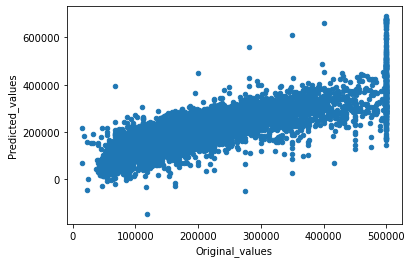

In [148]:
compare.plot.scatter(x='Original_values',y='Predicted_values')

In [165]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize=True)

lasso.fit(train_data, train_label)


C:\Users\Adil Naqvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(normalize=True)

In [166]:
original_values_lasso = test_label
predicted_values_lasso = lasso.predict(test_data)

compare_lasso = pd.DataFrame(data={"Original_values":original_values_lasso,"Predicted_values":predicted_values_lasso})

compare_lasso["Difference"] = compare_lasso["Original_values"]-compare_lasso["Predicted_values"]
compare_lasso

,Original_values,Predicted_values,Difference
6770,469100.0,379446.387201,89653.612799
18823,43500.0,22490.046835,21009.953165
7674,171100.0,242770.555245,-71670.555245
15312,106300.0,148611.116614,-42311.116614
3607,169400.0,146303.655712,23096.344288
...,...,...,...
17008,282400.0,304757.970800,-22357.970800
6443,233100.0,150051.318719,83048.681281
18475,239300.0,218478.282849,20821.717151
10897,175000.0,177331.517035,-2331.517035


In [167]:
lasso_mse = mean_squared_error(original_values_lasso,predicted_values_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

68137.06859788405

In [179]:
rmspe = np.sqrt(np.mean(np.square(((original_values_lasso - predicted_values_lasso) / original_values_lasso)), axis=0))
rmspe

0.46097179310002173

In [180]:
acc = 1-rmspe
acc*100

53.90282068999783

<AxesSubplot:xlabel='Original_values', ylabel='Predicted_values'>

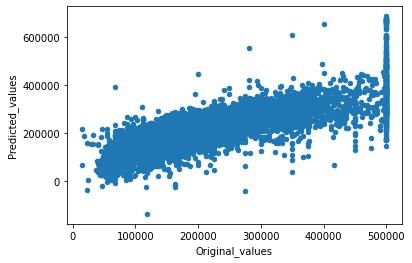

In [168]:
compare_lasso.plot.scatter(x='Original_values',y='Predicted_values')

### __Linear Regression__ or __Lasso Regression__ is not able to predict the Median House Values with good accuracy, thus the discrepancy in the plot
### We can try other Regression algortihms such as __Random Forest Regressor__

## __Random Forest Regression__

In [126]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(train_data,train_label)

RandomForestRegressor(random_state=42)

In [143]:
original_values_fr = train_label
predicted_values_fr = forest_reg.predict(train_data)

compare_fr = pd.DataFrame(data={"Original_values":train_label,"Predicted_values":predicted_values_fr})

compare_fr["Difference"] = compare_fr["Original_values"]-compare_fr["Predicted_values"]
compare_fr


,Original_values,Predicted_values,Difference
13325,88300.0,94222.00,-5922.00
20355,162500.0,224927.12,-62427.12
7481,95100.0,96233.00,-1133.00
15465,183900.0,178498.00,5402.00
18116,341900.0,358925.06,-17025.06
...,...,...,...
994,200200.0,185577.00,14623.00
5377,308300.0,313954.00,-5654.00
5448,344200.0,335418.00,8782.00
9813,253800.0,242721.00,11079.00


In [144]:
forest_mse = mean_squared_error(original_values_fr,predicted_values_fr)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18819.935952731637

In [181]:
rmspe = np.sqrt(np.mean(np.square(((original_values_fr - predicted_values_fr) / original_values_fr)), axis=0))
rmspe*100

11.426321843279306

In [176]:
acc = 1-rmspe
acc*100

88.57367815672069

<AxesSubplot:xlabel='Original_values', ylabel='Predicted_values'>

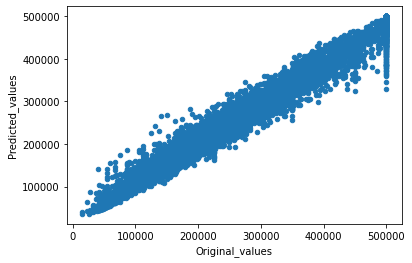

In [162]:
compare_fr.plot.scatter(x='Original_values',y='Predicted_values')

### It is clear that the __Random Forsest Regression__ algorithm provides better prediction values as compared to Linear Regression algorithim with an Accuracy of ___88.57%___